In [1]:
pip install surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

## Read Dataset

In [3]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [36]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [37]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [38]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


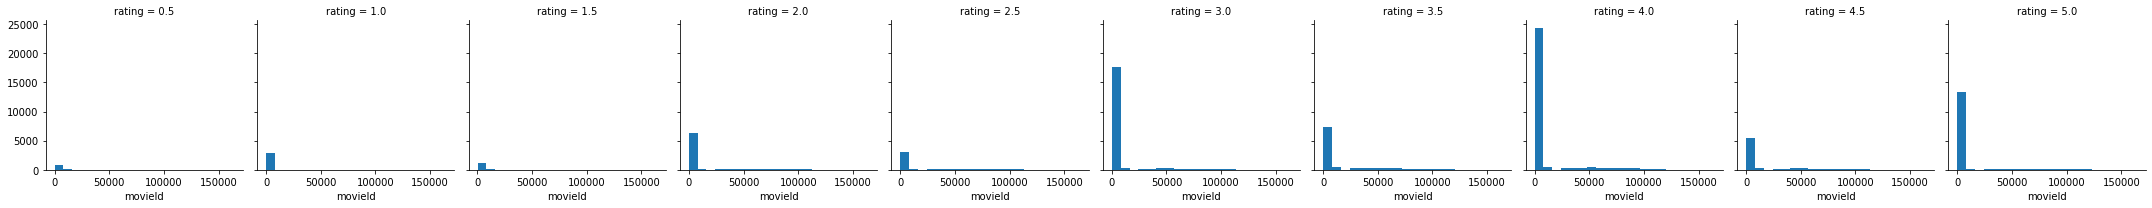

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(ratings, col='rating')
g.map(plt.hist, 'movieId', bins=20)

In [4]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

## Performance Evaluation of various model


### Probability Mass Function

In [5]:
pmf_svd = SVD(biased = False)
cv_pmf = cross_validate(pmf_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0078  1.0116  1.0115  1.0069  1.0038  1.0083  0.0029  
MAE (testset)     0.7782  0.7803  0.7795  0.7782  0.7750  0.7782  0.0018  
Fit time          12.88   10.18   5.94    5.44    5.83    8.05    2.97    
Test time         0.75    0.32    0.14    0.13    0.29    0.33    0.23    


In [6]:
cv_pmf

{'test_rmse': array([1.00778299, 1.0115909 , 1.01148958, 1.00689429, 1.00381165]),
 'test_mae': array([0.77820293, 0.78029396, 0.77949026, 0.77818405, 0.77498333]),
 'fit_time': (12.884175300598145,
  10.175636529922485,
  5.941149950027466,
  5.436122417449951,
  5.826518535614014),
 'test_time': (0.7513542175292969,
  0.3207402229309082,
  0.13585901260375977,
  0.13196492195129395,
  0.292985200881958)}

In [28]:
print('Average Mean Absolute Error (MAE) for PMF Collaborative Filtering: ', cv_pmf['test_mae'].mean())
print('Average Root Mean Square Error (RMSE) for Performance Measurement Framework (PMF) Collaborative Filtering: ', cv_pmf['test_rmse'].mean())

Average Mean Absolute Error (MAE) for PMF Collaborative Filtering:  0.7782309058500415
Average Root Mean Square Error (RMSE) for Performance Measurement Framework (PMF) Collaborative Filtering:  1.0083138815368855


### User-based CF

In [8]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
cv_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9601  0.9761  0.9701  0.9610  0.9690  0.9673  0.0060  
MAE (testset)     0.7404  0.7468  0.7433  0.7408  0.7448  0.7432  0.0024  
Fit time          0.14    0.18    0.36    0.27    0.18    0.23    0.08    
Test time         1.74    2.16    2.23    1.89    1.81    1.96    0.19    


In [30]:
print('Average Mean Absolute Error (MAE) for User-based Collaborative Filtering: ', cv_ub['test_mae'].mean())
print('Average Root Mean Square Error (RMSE) for User-based Collaborative Filtering: ', cv_ub['test_rmse'].mean())

Average Mean Absolute Error (MAE) for User-based Collaborative Filtering:  0.7431940341662131
Average Root Mean Square Error (RMSE) for User-based Collaborative Filtering:  0.967262472583285


### Item based CF

In [10]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
cv_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9328  0.9374  0.9383  0.9287  0.9377  0.9350  0.0037  
MAE (testset)     0.7179  0.7231  0.7246  0.7177  0.7231  0.7213  0.0029  
Fit time          5.04    5.55    5.19    4.67    5.83    5.26    0.40    
Test time         8.73    7.90    9.70    10.61   8.39    9.07    0.97    


In [11]:
print('Average MAE for Item-based Collaborative Filtering: ', cv_ib['test_mae'].mean())
print('Average RMSE for Item-based Collaborative Filtering: ', cv_ib['test_rmse'].mean())

Average MAE for Item-based Collaborative Filtering:  0.721284510185234
Average RMSE for Item-based Collaborative Filtering:  0.9349980736162016


## Comparison of similarity metrics

### User-based CF

#### Cosine

In [12]:
sim_options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNBasic(sim_options=sim_options);
cv_ub_cosine = cross_validate(ub_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9839  1.0039  0.9978  0.9887  0.9955  0.9939  0.0070  
MAE (testset)     0.7576  0.7765  0.7700  0.7660  0.7703  0.7681  0.0062  
Fit time          0.49    0.53    0.42    0.52    0.56    0.51    0.05    
Test time         1.93    1.60    1.92    1.99    1.96    1.88    0.14    


#### MSD

In [13]:
sim_options = {'name':'msd', 'user_based': True}
ub_msd = KNNBasic(sim_options=sim_options);
cv_ub_msd = cross_validate(ub_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9598  0.9748  0.9709  0.9644  0.9642  0.9668  0.0053  
MAE (testset)     0.7373  0.7502  0.7459  0.7419  0.7398  0.7430  0.0046  
Fit time          0.23    0.28    0.19    0.19    0.21    0.22    0.03    
Test time         2.40    2.32    1.76    1.68    1.89    2.01    0.30    


#### Pearson

In [14]:
sim_options = {'name':'pearson', 'user_based': True}
ub_pearson = KNNBasic(sim_options=sim_options);
cv_ub_pearson = cross_validate(ub_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0016  1.0026  0.9965  0.9958  0.9881  0.9969  0.0052  
MAE (testset)     0.7733  0.7780  0.7696  0.7694  0.7688  0.7718  0.0035  
Fit time          0.69    0.76    0.69    0.59    0.66    0.68    0.05    
Test time         1.92    1.85    1.84    1.59    1.71    1.78    0.12    


#### Observation

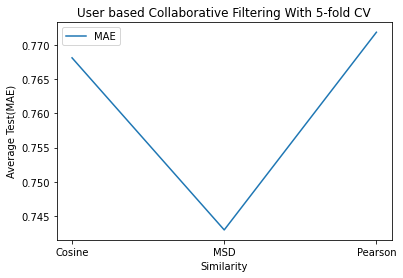

In [46]:
x = [0,1,2]
y_mae = [cv_ub_cosine['test_mae'].mean(),cv_ub_msd['test_mae'].mean(),cv_ub_pearson['test_mae'].mean()]
plt.plot(x, y_mae)
plt.title('User based Collaborative Filtering With 5-fold CV')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test - MAE')
plt.show()

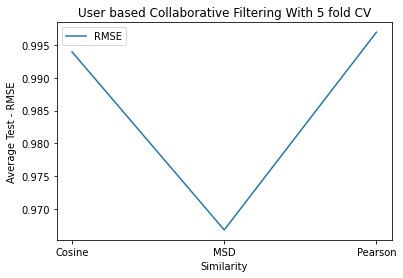

In [48]:
x = [0,1,2]
y_rmse = [cv_ub_cosine['test_rmse'].mean(),cv_ub_msd['test_rmse'].mean(),cv_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_rmse)
plt.title('User based Collaborative Filtering With 5 fold CV')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test - RMSE')
plt.show()

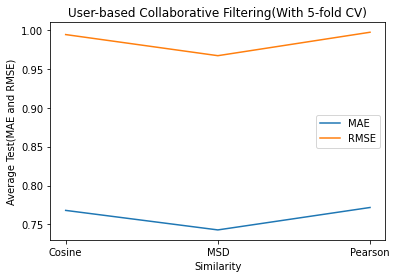

In [49]:
x = [0,1,2]
y_mae = [cv_ub_cosine['test_mae'].mean(),cv_ub_msd['test_mae'].mean(),cv_ub_pearson['test_mae'].mean()]
y_rmse = [cv_ub_cosine['test_rmse'].mean(),cv_ub_msd['test_rmse'].mean(),cv_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('User based Collaborative Filtering With 5 fold CV ')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE and RMSE)')
plt.show()

#### Cosine

In [16]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
cv_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9944  1.0028  0.9895  1.0003  0.9892  0.9952  0.0055  
MAE (testset)     0.7753  0.7812  0.7680  0.7796  0.7704  0.7749  0.0051  
Fit time          15.50   15.81   14.04   15.19   14.61   15.03   0.63    
Test time         8.72    8.12    8.88    8.27    8.35    8.47    0.29    


#### MSD

In [17]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9340  0.9363  0.9369  0.9314  0.9346  0.9347  0.0019  
MAE (testset)     0.7219  0.7200  0.7250  0.7209  0.7180  0.7212  0.0023  
Fit time          5.62    5.17    5.03    7.58    6.40    5.96    0.94    
Test time         8.36    8.90    10.38   9.70    7.74    9.01    0.94    


#### Pearson

In [18]:
sim_options = {'name':'pearson', 'user_based': False}
ib_pearson = KNNBasic(sim_options=sim_options);
cv_ib_pearson = cross_validate(ib_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9877  0.9837  0.9873  1.0011  0.9878  0.9895  0.0060  
MAE (testset)     0.7677  0.7623  0.7685  0.7745  0.7673  0.7681  0.0039  
Fit time          21.72   22.30   20.37   20.55   21.64   21.31   0.74    
Test time         8.96    8.34    9.11    8.72    9.05    8.83    0.28    


#### Observation

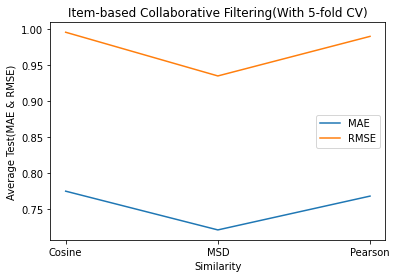

In [19]:
x = [0,1,2]
y_mae = [cv_ib_cosine['test_mae'].mean(),cv_ib_msd['test_mae'].mean(),cv_ib_pearson['test_mae'].mean()]
y_rmse = [cv_ib_cosine['test_rmse'].mean(),cv_ib_msd['test_rmse'].mean(),cv_ib_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('Item-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Average Test(MAE & RMSE)')
plt.show()

## Impact of Number of neighbours on model

In [20]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)

#### User-based CF

In [21]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,100,1))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

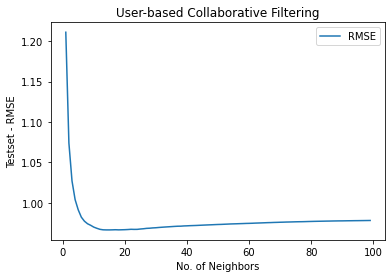

In [51]:
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('No. of Neighbors')
plt.ylabel('Testset - RMSE')
plt.legend(['RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

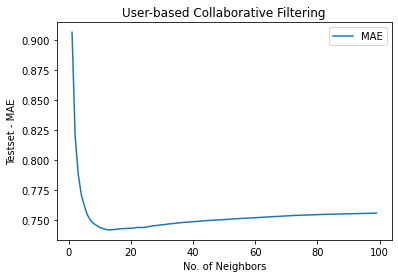

In [53]:
plt.plot(k1,ubc_nn_mae)
plt.xlabel('No. of Neighbors')
plt.ylabel('Testset - MAE')
plt.legend(['MAE'])
plt.title('User-based Collaborative Filtering')
plt.show()

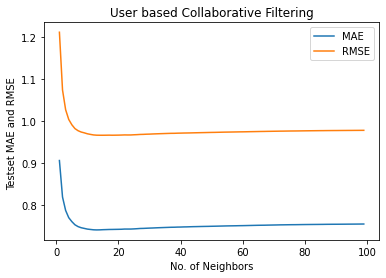

In [54]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('No. of Neighbors')
plt.ylabel('Testset MAE and RMSE ')
plt.legend(['MAE','RMSE'])
plt.title('User based Collaborative Filtering')
plt.show()

In [55]:
#Good K
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Good Value of K : ', k_ubc)
print('Min RMSE : ', min(ubc_nn_rmse))

Good Value of K :  15
Min RMSE :  0.9663589276453397


#### Item-based CF

In [24]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8749
RMSE: 1.1479
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8142
RMSE: 1.0514
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7855
RMSE: 1.0127
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 0.9935
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7614
RMSE: 0.9816
Computing 

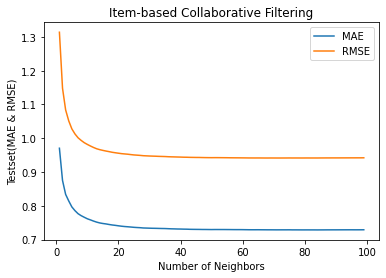

In [25]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE & RMSE)')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()

In [56]:
#Top K
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Good Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Good Value of K :  68
Minimum RMSE :  0.941359509155313
